<p style="text-align: center;"> <span style="color:firebrick"> <font size="5"> <b> USC Marshall School of Business </b> </font> </p> </span> 

<p style="text-align: center;"> <b> <font font size="5"> DSO 545-Data Visualization  </p> </b></font>

<p style="text-align: center;"> <b> Fall 2020 </b> </p>



## <span style="color:blue"> Xiangyu Huang </span>

In [1]:
import plotly.graph_objs as go
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import plotly.express as px
from plotly.offline import download_plotlyjs, init_notebook_mode,  iplot
import plotly.graph_objects as go
import plotly.io as pio
pio.renderers.default = "notebook_connected"



In [2]:
data1 = pd.read_csv('World.csv')
data1.head()

,Year,Energy Sector,Carrier Type,Final Energy Demand,RE Share,CumSumEnergy
0,2015,Transportation,Electricity,1503,0.015467,1503
1,2020,Transportation,Electricity,1855,0.018480,1855
2,2025,Transportation,Electricity,4930,0.062231,4930
3,2030,Transportation,Electricity,11034,0.184887,11034
4,2035,Transportation,Electricity,17582,0.365423,17582


In [3]:
data1['label'] = None
def func1(x):
    return f'{round(100*x)}% electrification'
data1.loc[data1['Carrier Type'] == 'Electricity',['label']] = data1.loc[data1['Carrier Type'] == 'Electricity']['RE Share'].apply(lambda x: func1(x))
data1.head()

,Year,Energy Sector,Carrier Type,Final Energy Demand,RE Share,CumSumEnergy,label
0,2015,Transportation,Electricity,1503,0.015467,1503,2% electrification
1,2020,Transportation,Electricity,1855,0.018480,1855,2% electrification
2,2025,Transportation,Electricity,4930,0.062231,4930,6% electrification
3,2030,Transportation,Electricity,11034,0.184887,11034,18% electrification
4,2035,Transportation,Electricity,17582,0.365423,17582,37% electrification


In [4]:
[(i,j) for i in data1['Energy Sector'].unique() for j in data1['Carrier Type'].unique()]

[('Transportation', 'Electricity'),
 ('Transportation', 'Other Carrier'),
 ('Industry', 'Electricity'),
 ('Industry', 'Other Carrier'),
 ('Buildings/Others', 'Electricity'),
 ('Buildings/Others', 'Other Carrier')]

In [5]:
[0]+data1[data1['Year'] == 2015][['CumSumEnergy','Carrier Type']]['CumSumEnergy'].tolist()[:5]

[0, 1503, 97185, 127776, 210746, 251386]

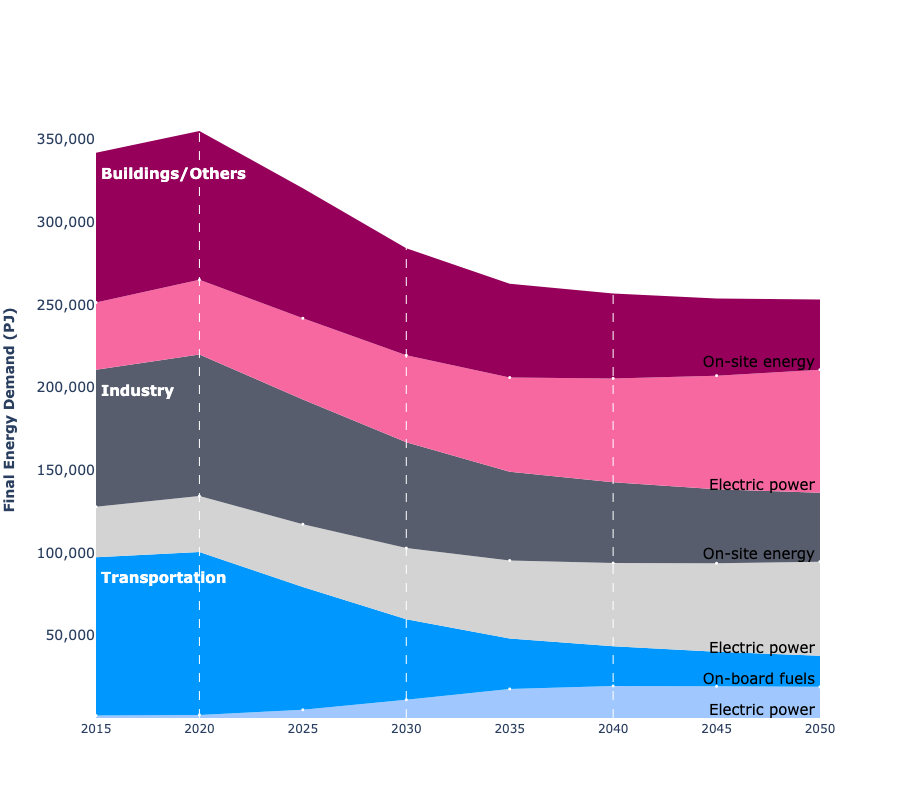

In [11]:


x = data1['Year'].unique()
kind = [(i,j) for i in data1['Energy Sector'].unique() for j in data1['Carrier Type'].unique()]
fig = go.Figure()
clrs = ['rgb(160,200,255)','rgb(0,152,255)','lightgrey','#575d6d','rgb(247,104,161)','rgb(150,0,90)']
for count, trace in enumerate(kind):
    if count == 0:
        fill = 'tozeroy'
    else:
        fill = 'tonexty'
    if trace[1] == 'Electricity':
        md = 'markers'
    else:
        md = 'none'
    y = data1[(data1['Carrier Type'] == trace[1])&(data1['Energy Sector'] == trace[0])]['CumSumEnergy']
    fig.add_trace(go.Scatter(x=x, y=y, fill=fill, fillcolor = clrs[count],
                    mode=md, name = str(trace[0])+'-'+str(trace[1]),
                    text = data1[(data1['Carrier Type'] == trace[1])&(data1['Energy Sector'] == trace[0])]['label'],
                    marker = dict(size=3, color = 'white')))
ant = data1[(data1['Carrier Type'] == 'Other Carrier')&(data1['Year'] == 2015)][['CumSumEnergy','Energy Sector']].set_index('Energy Sector')
for anno in ant.index:
    fig.add_annotation(x=2015, align = 'left', y=ant.loc[anno,'CumSumEnergy'],
                text=f'<b>{anno}</b>',
                width = 200,
                showarrow=False,
                xshift=105,
                yshift = -20,
                font = dict(size = 15, color = 'white'),                
                )

for y,anno2 in zip([0]+data1[data1['Year'] == 2050][['CumSumEnergy','Carrier Type']]['CumSumEnergy'].tolist()[:5],
                  ['Electric power', 'On-board fuels', 'Electric power', 'On-site energy', 'Electric power', 'On-site energy']):        
    fig.add_annotation(x=2050, align = 'right', y=y,
                text=anno2,
                width = 200,
                showarrow=False,
                xshift=-105,
                yshift = 9,
                font = dict(size = 15, color = 'black'),                
                )
fig.update_layout(yaxis = dict(title = '<b>Final Energy Demand (PJ)<b>', showgrid = False, tickfont=dict(size=14),
                        ticktext=[str(i)+',000' for i in [50,100,150,200,250,300,350]], 
                        tickvals=[1000*i for i in [50,100,150,200,250,300,350]]),
                  xaxis =dict(showgrid = False),
                  plot_bgcolor = 'white',
                  showlegend=False)
for vl in [2020,2030,2040]:
    fig.add_shape(type="line", x0=vl, y0=0, x1=vl, y1=data1['CumSumEnergy'].max(),
        line=dict(color="white",width=1, dash = 'dash')
)
fig.update_layout(
    autosize=False,
    width=900,
    height=800)

fig.show('png')


**Code for Figure 2:**

In [7]:
cleandf = pd.read_csv('World.csv')
cleandf.head()

,Year,Energy Sector,Carrier Type,Final Energy Demand,RE Share,CumSumEnergy
0,2015,Transportation,Electricity,1503,0.015467,1503
1,2020,Transportation,Electricity,1855,0.018480,1855
2,2025,Transportation,Electricity,4930,0.062231,4930
3,2030,Transportation,Electricity,11034,0.184887,11034
4,2035,Transportation,Electricity,17582,0.365423,17582


In [8]:
df1 = pd.read_csv('data_for_pic2.csv', index_col = 0)
df2 = pd.read_csv('data_for_pic2_partb.csv', index_col = 0)

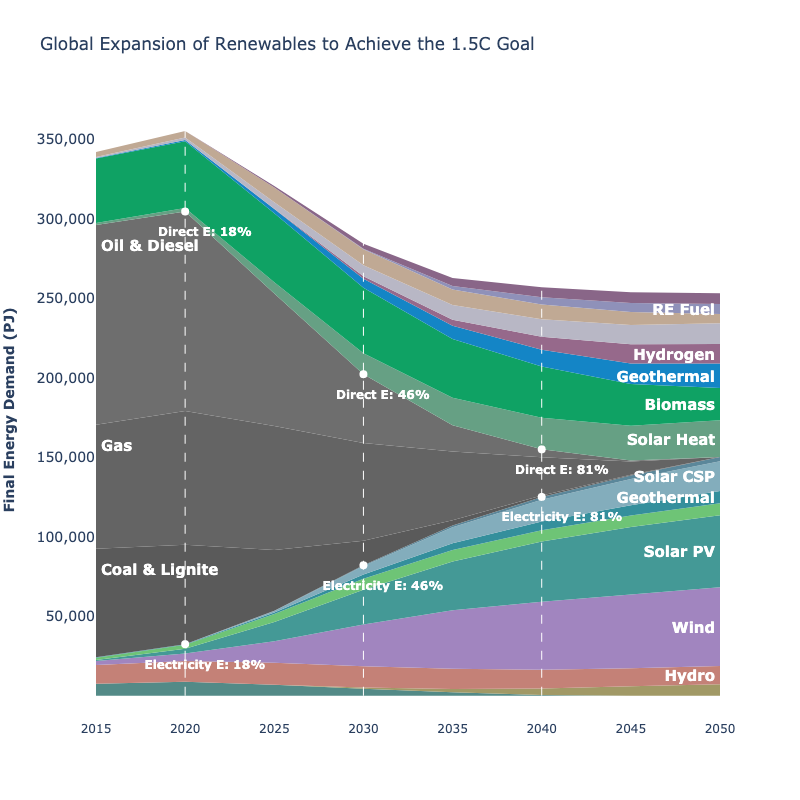

In [10]:
from plotly.offline import download_plotlyjs, init_notebook_mode,  iplot
init_notebook_mode(connected=True)


x = df1['year'].unique()
kind = [(i,j) for i in df1['Sector'].unique() for j in df1['Category'].unique()]
fig = go.Figure()
clrs = []
black_clrs = []
for i in range(len(kind)):
    clrs.append(f'rgb({np.random.randint(0,200)},{np.random.randint(100,200)},{np.random.randint(100,200)})')
for i in range(20):
    black_clrs.append(f'rgb({10*i},{10*i},{10*i})')
FF_count = 0
for count, trace in enumerate(kind):
    if count == 0:
        fill = 'tozeroy'
    else:
        fill = 'tonexty'

    y = df1[(df1['Category'] == trace[1])&(df1['Sector'] == trace[0])]['CumSumEnergy']
    if trace[0] == 'FFs':
        color_to_fill = black_clrs[FF_count]
        FF_count += 1
    else:
        color_to_fill = clrs[count]
    
    fig.add_trace(go.Scatter(x=x, y=y, fill=fill, fillcolor = color_to_fill,
                    mode='none', 
                    name = str(trace[0])+'-'+str(trace[1]),
                    text = df2[(df2['Carrier Type'] == trace[0])]['percentage'].apply(lambda x: f'{round(x*100, 2)}%').values,
                    marker = dict(size=3, color = 'white')))
    
ant1 = df1[(df1['Sector'] == 'FFs')&(df1['year'] == 2015)][['CumSumEnergy','Category']].set_index('Category')
for anno in ant1.index:
    fig.add_annotation(x=2015, align = 'left', y=ant1.loc[anno,'CumSumEnergy'],
                text=f'<b>{anno}</b>',
                width = 200,
                showarrow=False,
                xshift=105,
                yshift = -20,
                font = dict(size = 15, color = 'white'),                
                )
ant2 = df1[(df1['Sector'] != 'FFs')&(df1['year'] == 2050)][['CumSumEnergy','Category']].set_index('Category')
print_dict = {'Synfuels':'RE Fuel', 'RE District heat':'RE District', 'H Process':'Hydrogen', 'Geothermal':'Geothermal', 
 'Biomass':'Biomass',
 'Solar Heat': 'Solar Heat',
 'Hydro Power': 'Hydro',
 'Wind':'Wind',
 'Geothermal Power': 'Geothermal',
 'Solar thermal power plants': 'Solar CSP',
'PV': 'Solar PV'}

for i in range(len(ant2.index)):
    anno = ant2.index.values[i]
    prev_anno = ant2.index.values[i-1]
    if anno in print_dict.keys():
        if i != 1:
            height_val = np.mean([ant2.loc[anno,'CumSumEnergy'], ant2.loc[prev_anno,'CumSumEnergy']])
        else:
            height_val = ant2.loc[anno,'CumSumEnergy']
        fig.add_annotation(x=2050, align = 'right', y= height_val,
                    text=f'<b>{print_dict[anno]}</b>',
                    width = 200,
                    showarrow=False,
                    xshift= -105,
                    yshift = 0,
                    font = dict(size = 15, color = 'white'),                
                    )

fig.update_layout(yaxis = dict(title = '<b>Final Energy Demand (PJ)<b>', showgrid = False, tickfont=dict(size=14),
                        ticktext=[str(i)+',000' for i in [50,100,150,200,250,300,350]], 
                        tickvals=[1000*i for i in [50,100,150,200,250,300,350]]),
                  xaxis =dict(showgrid = False),
                  plot_bgcolor = 'white',
                  showlegend=False)
for vl in [2020,2030,2040]:
    fig.add_shape(type="line", x0=vl, y0=0, x1=vl, y1=df1['CumSumEnergy'].max(),
        line=dict(color="white",width=1, dash = 'dash')
)
    
cat_h_dict = df1.groupby(['year','Sector']).CumSumEnergy.max()
Direct_hs = []
Electric_hs = []
for year in [2020,2030,2040]:
    Direct_h = cat_h_dict.loc[year, 'FFs']
    Direct_hs.append(Direct_h)
    Electric_h = cat_h_dict.loc[year, 'POWER']
    Electric_hs.append(Electric_h)
    pct_D = int(df2[(df2['Carrier Type'] == 'OTHER HEAT')&(df2['year']==year)].percentage.values[0]*100)
    fig.add_annotation(x=year, align = 'center', y= Direct_h,
                    text=f'<b>Direct E: {pct_D}%</b>',
                    width = 200,
                    showarrow=False,
                    xshift= 20,
                    yshift = -20,
                    font = dict(size = 12, color = 'white'),                
                    )
    pct_E = int(df2[(df2['Carrier Type'] == 'POWER')&(df2['year']==year)].percentage.values[0]*100)
    fig.add_annotation(x=year, align = 'center', y= Electric_h,
                    
                    text=f'<b>Electricity E: {pct_D}%</b>',
                    width = 200,
                    showarrow=False,
                    xshift= 20,
                    yshift = -20,
                    font = dict(size = 12, color = 'white')     
                    )
fig.add_trace(
    go.Scatter(
        x = [2020,2030,2040],
        y = Direct_hs,
        mode = 'markers',
        marker = dict(size=8, color = 'white'))  
)
fig.add_trace(
    go.Scatter(
        x = [2020,2030,2040],
        y = Electric_hs,
        mode = 'markers',
        marker = dict(size=8, color = 'white'))
)

fig.update_layout(
    title = 'Global Expansion of Renewables to Achieve the 1.5C Goal',
    autosize=False,
    width=800,
    height=800)

fig.show('png')
